In [16]:
# import data from google spreadsheet

# google spreadsheet url
PIGLEG_SPREADSHEET_URL = r"https://docs.google.com/spreadsheets/d/1U9...........y35V/r/edit/edit?"

import pandas as pd

# PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?", "export?format=csv")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?", "export?format=xlsx")
url = PIGLEG_SPREADSHEET_URL


In [17]:
import json


with open("pigleg_spreadsheet_url.json", "w") as f:
    json.dump(dict(url=url), f)

In [18]:
with open("pigleg_spreadsheet_url.json", "r") as f:
    dct = json.load(f)
    url = dct["url"]
    
PIGLEG_SPREADSHEET_URL = url

In [19]:
import pigleg_evaluation_tools as pet

sheet_names = [0, 1, 2, 3]
dfs = {}
for name in sheet_names:
    df = pd.read_excel(url, sheet_name=name)
    df = pet.replace_comma_with_dot(df)
    dfs[name] = df
    print(f"{name}: {df.shape}")
    
# concatenate the dataframes and add prefix to the columns

df0 = dfs[0].copy()
df1 = dfs[1].copy()
df2 = dfs[2].copy()
df3 = dfs[3].copy()


dfs[0].columns = [f"df0 {col}" for col in dfs[0].columns]
dfs[1].columns = [f"df1 {col}" for col in dfs[1].columns]
dfs[2].columns = [f"df2 {col}" for col in dfs[2].columns]
dfs[3].columns = [f"df3 {col}" for col in dfs[3].columns]

df = pd.concat(dfs.values(), axis=1)



0: (54, 29)
1: (66, 23)
2: (59, 13)
3: (54, 12)


In [14]:
dfs[0].columns

Index(['df0 Unnamed: 0', 'df0 filename', 'df0 stitch_id', 'df0 report_url',
       'df0 Wich from couple is the better?',
       'df0 smoothness of the movement (1 = bad, 5=smooth)',
       'df0 concentration of trajectory around incison (1-5)',
       'df0 static appearance of the stitch (1-5)',
       'df0 more movement in secod part of video (1-5)', 'df0 my overal score',
       'df0 overall score', 'df0 data_split', 'df0 movement evaluation stitch',
       'df0 Stitch duration [s]', 'df0 Needle holder stitch length [m]',
       'df0 Needle holder stitch median area presence [%]',
       'df0 Needle holder to forceps piercing below threshold [s]',
       'df0 Needle holder knot to piercing length [-]',
       'df0 Needle holder stitch velocity above threshold',
       'df0 Static quality stitch', 'df0 stars movement evaluation stitch',
       'df0 stars Stitch duration [s]',
       'df0 stars Needle holder stitch length [m]',
       'df0 stars Needle holder stitch median area presen

In [15]:
df

/opt/conda/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/conda/lib/python3.8/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


df0 Unnamed: 0                                       df0 filename  \
0              0.0          Einzelknopfnaht_Schwein_Kerstin_Preuß.mp4   
1              2.0  Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...   
2              1.0              Einzelknopfnaht_Elena.Vai-Wieting.mov   
3              3.0      Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
4              4.0      Bildschirmaufnahme_2022-10-11_um_11.20.24.mov   
..             ...                                                ...   
61             NaN                                                NaN   
62             NaN                                                NaN   
63             NaN                                                NaN   
64             NaN                                                NaN   
65             NaN                                                NaN   

    df0 stitch_id                                     df0 report_url  \
0             4.0  http://suran.kky.zcu.cz:8000//uploader/web_rep...   
1             0.0  http://suran.kky.zcu.cz:8000//uploader/web_rep...   
2             0.0  http://suran.kky.zcu.cz:8000//uploader/web_rep...   
3             3.0  http://suran.kky.zcu.cz:8000//uploader/web_rep...   
4             1.0  http://suran.kky.zcu.cz:8000//uploader/web_rep...   
..            ...                                                ...   
61            NaN                                                NaN   
62            NaN                                                NaN   
63            NaN                                                NaN   
64            NaN                                                NaN   
65            NaN                                                NaN   

   df0 Wich from couple is the better?  \
0                                False   
1                                 True   
2                                False   
3                                 True   
4                                False   
..                                 ...   
61                                 NaN   
62                                 NaN   
63                                 NaN   
64                                 NaN   
65                                 NaN   

    df0 smoothness of the movement (1 = bad, 5=smooth)  \
0                                                 NaN    
1                                                 NaN    
2                                                 NaN    
3                                                 NaN    
4                                                 NaN    
..                                                ...    
61                                                NaN    
62                                                NaN    
63                                                NaN    
64                                                NaN    
65                                                NaN    

    df0 concentration of trajectory around incison (1-5)  \
0                                                 NaN      
1                                                 NaN      
2                                                 NaN      
3                                                 NaN      
4                                                 NaN      
..                                                ...      
61                                                NaN      
62                                                NaN      
63                                                NaN      
64                                                NaN      
65                                                NaN      

    df0 static appearance of the stitch (1-5)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...

In [10]:
df1 = dfs[1]
df2 = dfs[2]
df3 = dfs[3]




In [11]:
# correlate df1 and df2 with df3
from scipy import stats
# from scipy.stats import pearsonr
data = []
for col in df3.columns:
        try:
            v0 = df0[col].astype(float)
            v1 = df1[col].astype(float)
            # v3 = df3[col].astype(float)
            corr01, pval01 = stats.spearmanr(v0, v1, nan_policy="omit")
            # corr13, pval13 = stats.spearmanr(v1, v3, nan_policy="omit")
            # corr23, pval23 = stats.spearmanr(v2, v3, nan_policy="omit")
            dct = dict(
                row=col, 
                corr12=corr01,
                # corr13=corr13,
                # corr23=corr23,
                pval12=pval01,
                # pval13=pval13,
                # pval23=pval23,
            
            )
            data.append(dct)
        except Exception as e:
            print("error:", e)
            pass
        
        
pd.DataFrame(data)


error: 'df2 filename'
error: 'df2 stitch_id'
error: 'df2 report_url'
error: 'df2 Which from couple is the better?'
error: 'df2 smoothness of the movement (1 = bad, 5=smooth)'
error: 'df2 concentration of trajectory around incison (1-5)'
error: 'df2 stitch and incision is perpendicular in the end (1-5)'
error: 'df2 more movement in second part of video (1-5)'
error: 'df2 my overall score (1-5)'
error: 'df2 data_split'
error: 'df2 note'
error: 'df2 order'


Empty DataFrame
Columns: []
Index: []

In [197]:
a = df1["Which from couple is the better?"].astype(float)
b = df2["Which from couple is the better?"].astype(float)
import scipy.stats as stats

stats.spearmanr(a, b)

stats.pearsonr(a, b)

KeyError: 'Which from couple is the better?'

In [198]:
df.keys()

Index(['df0 filename', 'df0 stitch_id', 'df0 report_url',
       'df0 Which from couple is the better?',
       'df0 smoothness of the movement (1 = bad, 5=smooth)',
       'df0 concentration of trajectory around incison (1-5)',
       'df0 stitch and incision is perpendicular in the end (1-5)',
       'df0 more movement in second part of video (1-5)',
       'df0 my overall score (1-5)', 'df0 data_split', 'df0 note', 'df0 order',
       'df1 filename', 'df1 stitch_id', 'df1 report_url',
       'df1 Which from couple is the better?',
       'df1 smoothness of the movement (1 = bad, 5=smooth)',
       'df1 concentration of trajectory around incison (1-5)',
       'df1 stitch and incision is perpendicular in the end (1-5)',
       'df1 more movement in second part of video (1-5)',
       'df1 my overall score (1-5)', 'df1 data_split', 'df1 note', 'df1 order',
       'df2 filename', 'df2 stitch_id', 'df2 report_url',
       'df2 Which from couple is the better?',
       'df2 smoothness of

In [199]:
cols_all = []
cols1 = []

for col in df.keys():
    append = True
    if "df3" in col:
        append = True
    if "note" in col:
        append = False
    if "stitch_id" in col:
        append = False
        
    if "order" in col:
        append = False
        
    if "df3 Which" in col:
        append = False
    if "df3 smoothness" in col:
        append = False
        
    if "df3 concentration" in col:
        append = False
        
    if "df3 static" in col:
        append = False
        
        
    if "df3 more" in col:
        append = False
        
    if "Unnamed" in col:
        append = False
    if "df3 my overal" in col:
        append = False
        
    if "stars" in col:
        append = False
    try:
        
        df[col].astype(float)
    except:
        append = False
        
        
    if append:
        cols_all.append(col)

cols_all
# df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

['df0 Which from couple is the better?',
 'df0 smoothness of the movement (1 = bad, 5=smooth)',
 'df0 concentration of trajectory around incison (1-5)',
 'df0 stitch and incision is perpendicular in the end (1-5)',
 'df0 more movement in second part of video (1-5)',
 'df0 my overall score (1-5)',
 'df1 Which from couple is the better?',
 'df1 smoothness of the movement (1 = bad, 5=smooth)',
 'df1 concentration of trajectory around incison (1-5)',
 'df1 stitch and incision is perpendicular in the end (1-5)',
 'df1 more movement in second part of video (1-5)',
 'df1 my overall score (1-5)',
 'df2 Which from couple is the better?',
 'df2 smoothness of the movement (1 = bad, 5=smooth)',
 'df2 concentration of trajectory around incison (1-5)',
 'df2 stitch and incision is perpendicular in the end (1-5)',
 'df2 more movement in second part of video (1-5)',
 'df2 my overall score (1-5)',
 'df3 Wich from couple is the better?',
 'df3 overall score',
 'df3 movement evaluation stitch',
 'df3 Sti

In [200]:
df.to_excel("df.xlsx")

In [201]:
cols01 = []
for col in cols_all:
    append = False
    if "df0" in col:
        append = True
    if "df1" in col:
        append = True
        
    if append:
        cols01.append(col)
cols01

['df0 Which from couple is the better?',
 'df0 smoothness of the movement (1 = bad, 5=smooth)',
 'df0 concentration of trajectory around incison (1-5)',
 'df0 stitch and incision is perpendicular in the end (1-5)',
 'df0 more movement in second part of video (1-5)',
 'df0 my overall score (1-5)',
 'df1 Which from couple is the better?',
 'df1 smoothness of the movement (1 = bad, 5=smooth)',
 'df1 concentration of trajectory around incison (1-5)',
 'df1 stitch and incision is perpendicular in the end (1-5)',
 'df1 more movement in second part of video (1-5)',
 'df1 my overall score (1-5)']

In [204]:
# df[cols01].corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

In [205]:
import numpy as np
import itertools
def select_columns_containing(cols_all, pattern):
    return [col for col in cols_all if pattern in col]

def corr_spearmanr(df, cols0, cols1):
    corr_matrix = pd.DataFrame(index=cols0, columns=cols1)
    pval_matrix = pd.DataFrame(index=cols0, columns=cols1)


    # for col0 in cols0:
    #     for col1 in cols1:

    for col0, col1 in itertools.product(cols0, cols1):
        try:
            # corr_matrix.loc[col0, col1] = df[col0].corr(df[col1])
            st = stats.spearmanr(df[col0], df[col1], nan_policy="omit")
            corr_matrix.loc[col0, col1] = st.correlation
            pval_matrix.loc[col0, col1] = st.pvalue

        except:
            import traceback
            print(col0, col1)
            traceback.print_exc()
            corr_matrix.loc[col0, col1] = np.nan

    return corr_matrix, pval_matrix



# Ana and Carina

In [222]:
cols0 = select_columns_containing(cols_all, "df0")
cols1 = select_columns_containing(cols_all, "df1")
# Assuming df is your DataFrame and cols0, cols1 are the column sets
# Make sure cols0 and cols1 have the same length


corr_matrix, pval_matrix = corr_spearmanr(df, cols0, cols1)
# Convert the correlation matrix to numeric (to avoid issues with NaNs)
corr_matrix = corr_matrix.astype(float).abs()
pval_matrix = pval_matrix.astype(float)

# Now, you can apply the style and background gradient
display("Spearman correlation")
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=0, vmax=1))

display("# p-values")
display(pval_matrix.style.background_gradient(cmap='YlGn', vmin=0, vmax=.05))



'Spearman correlation'

'# p-values'

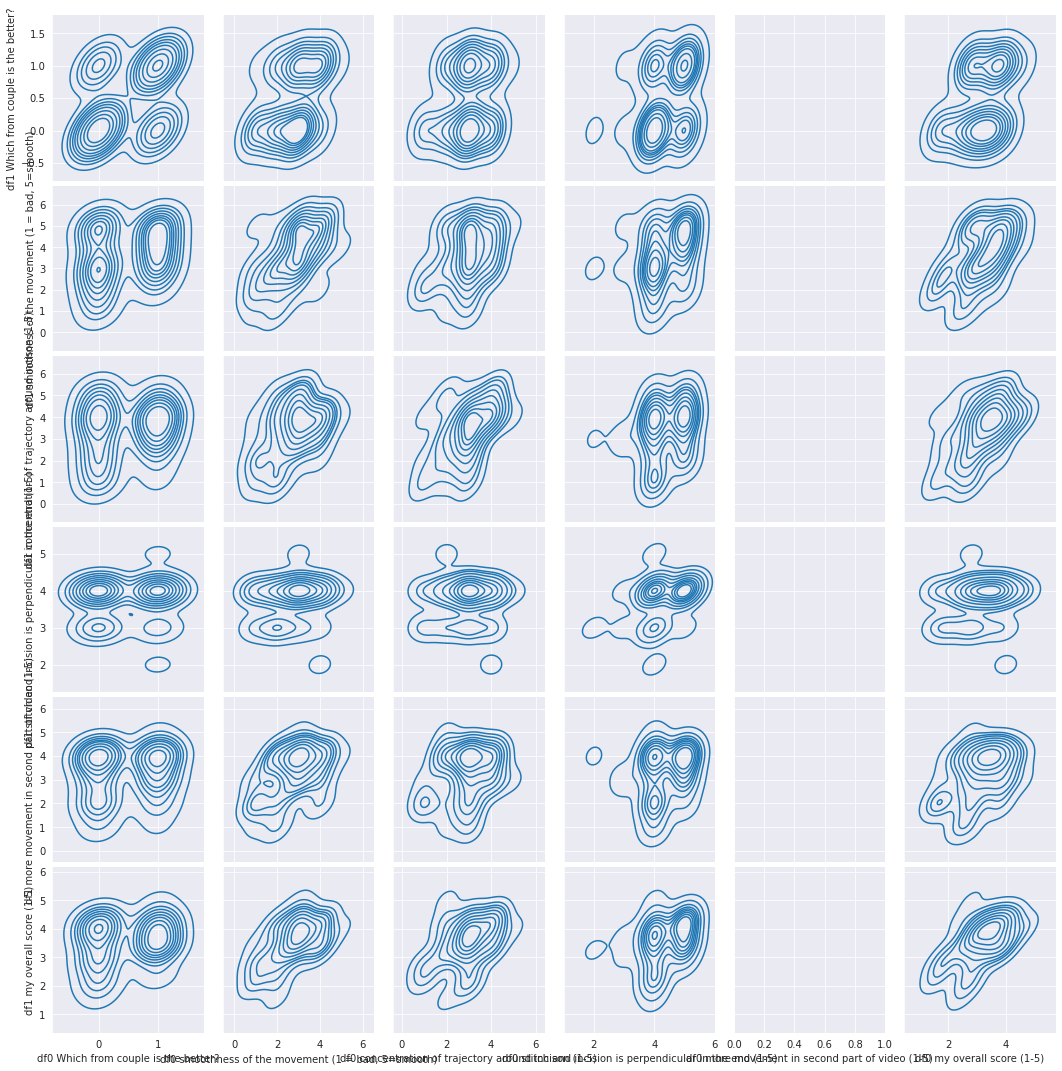

In [212]:

import seaborn as sns

# kde in pairplot
sns.pairplot(df, x_vars=cols0, y_vars=cols1, kind="kde")



# Compare human and machine

In [224]:

# cols0 = select_columns_containing(cols_all, "df0") + select_columns_containing(cols_all, "df1")
cols0 = select_columns_containing(cols_all, "df0")
cols1 = select_columns_containing(cols_all, "df3")
# Assuming df is your DataFrame and cols0, cols1 are the column sets
# Make sure cols0 and cols1 have the same length


corr_matrix, pval_matrix = corr_spearmanr(df, cols1, cols0)
corr_matrix = corr_matrix.astype(float).abs()
pval_matrix = pval_matrix.astype(float)
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=0, vmax=1))
# corr_matrix = corr_matrix.astype(float).style.background_gradient(cmap='coolwarm')
# df[cols0].corr(numeric_only=True).style.backgrouknd_gradient(cmap='coolwarm')
display(pval_matrix.style.background_gradient(cmap='YlGn', vmin=0, vmax=.05))



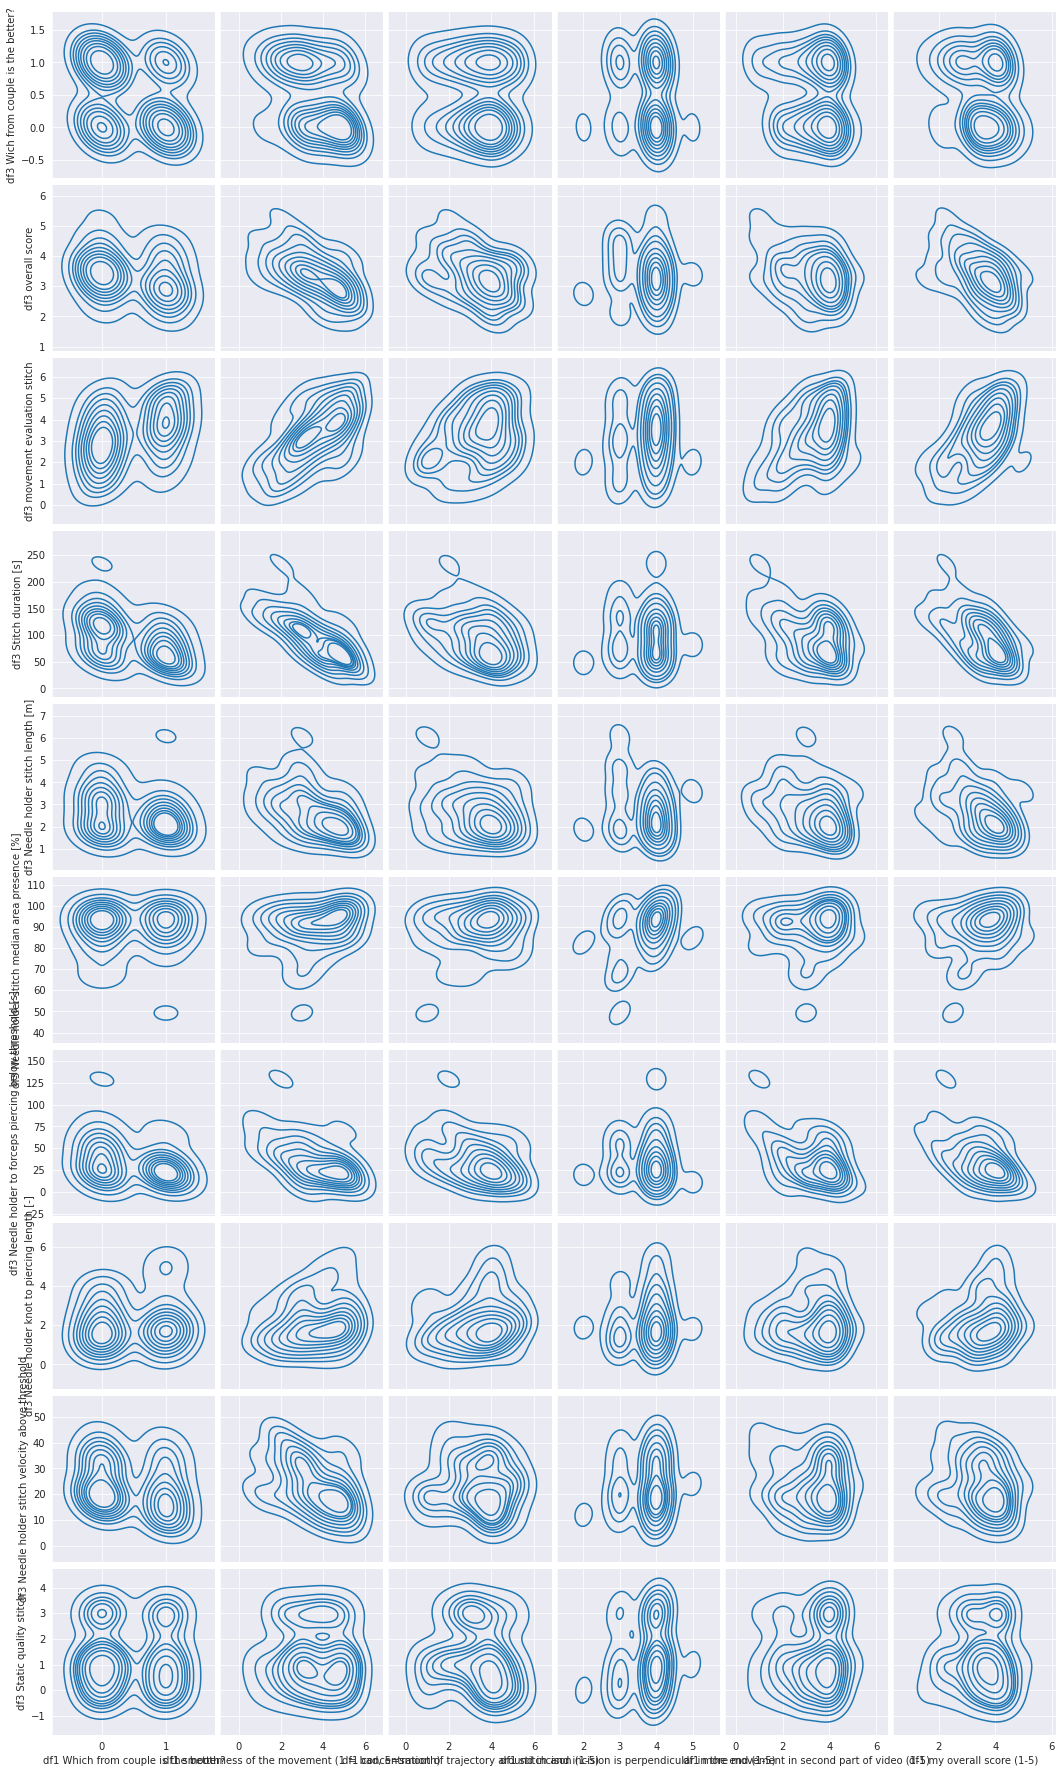

In [226]:

sns.pairplot(df, x_vars=cols0, y_vars=cols1, kind="kde")


In [227]:

# cols0 = select_columns_containing(cols_all, "df0") + select_columns_containing(cols_all, "df1")
cols0 = select_columns_containing(cols_all, "df1")
cols1 = select_columns_containing(cols_all, "df3")
# Assuming df is your DataFrame and cols0, cols1 are the column sets
# Make sure cols0 and cols1 have the same length


corr_matrix, pval_matrix = corr_spearmanr(df, cols1, cols0)
corr_matrix = corr_matrix.astype(float).abs()
pval_matrix = pval_matrix.astype(float)
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=0, vmax=1))
# corr_matrix = corr_matrix.astype(float).style.background_gradient(cmap='coolwarm')
# df[cols0].corr(numeric_only=True).style.backgrouknd_gradient(cmap='coolwarm')
display(pval_matrix.style.background_gradient(cmap='YlGn', vmin=0, vmax=.05))


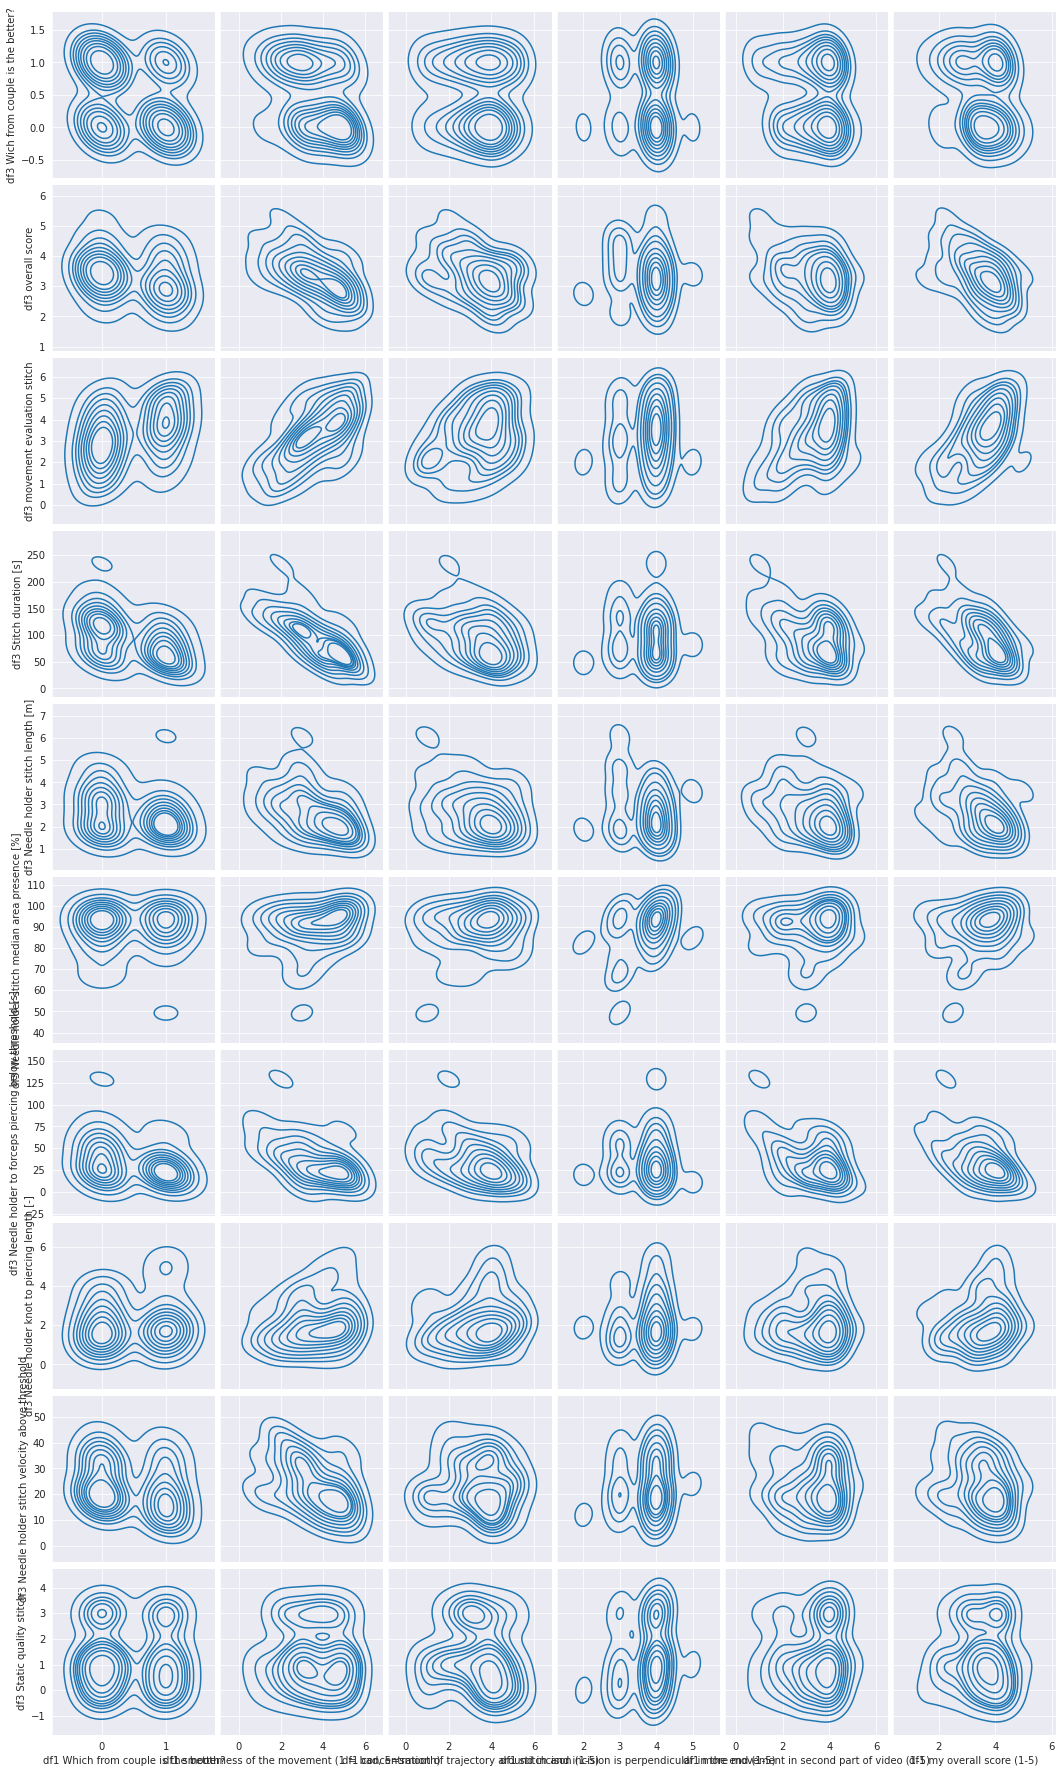

In [228]:
import seaborn as sns

sns.pairplot(df, x_vars=cols0, y_vars=cols1, kind="kde")

In [77]:
df.shape

(216, 65)

# Analyze the data